In [1]:
import os
import torch
import time
from dataloader import TimeseriesDataloader
from karpathy_transformer import KarpathyTransformerRunner
from transformer_common import TransformerConfig
import matplotlib.pyplot as plt
print(torch.cuda.is_available())

# https://www.kaggle.com/datasets/footballjoe789/us-stock-dataset/data


False


In [2]:
# Start the timer
start_time = time.time()

input_tensor_file = 'stock_history_data.pt'

if os.path.exists(input_tensor_file):
    data = torch.load(input_tensor_file)
    ln = len(data)
    print(f"Tensor loaded successfully: {input_tensor_file}, len={ln}")
else:
    directory_path = './us-stock-dataset/Data/StockHistory'

    all_files = [os.path.splitext(f)[0] for f in os.listdir(directory_path) if f.endswith('.csv')]

    # stocks_to_load = [
    #     "AAPL", "TSLA",
    #     "A", "GOOG", "AMZN", "PYPL", "NVDA", "AMD",
    #     "NFLX", "MSFT", "INTC", "CSCO", "ADBE", "CRM", "QCOM", "TXN", "AVGO",
    #     "INTU", "ORCL", "COST", "SBUX", "AMGN", "CHTR", "GILD", "CMCSA", "BKNG",
    #     "MDLZ", "FISV", "BIIB", "MU", "MCD", "AMAT", "ADP", "ILMN", "ATVI", "ISRG",
    #     "ADSK", "LRCX", "BIDU", "JD", "REGN", "WBA", "VRTX", "KHC", "WMT", "ZM", "MELI",
    #     "TMUS", "CTSH", "XLNX", "PCAR", "ALGN", "WDAY", "SIRI", "CTXS", "ADI", "EXC", "LULU",
    #     "MAR", "KLAC", "PAYX", "EA", "ILMN", "ALXN", "MNST", "BMRN", "EBAY", "CTAS", "VRSK",
    #     "IDXX", "CDNS", "NXPI", "ASML", "INCY", "KLAC", "MCHP", "SNPS", "SWKS", "VRSN",
    #     "WDC", "WYNN", "XLNX", "ZBRA", "ZTS", "AEP", "AIG", "ALL", "AXP", "BA", "BAC",
    #     "BK", "BLK", "C", "CAT", "CL", "COF", "COP", "COST", "CSCO", "CVS", "CVX",
    #     "DD", "DHR", "DIS", "DOW", "DUK", "EMR", "EXC", "F", "FDX", "GD", "GE", "GILD",
    #     "GM", "GOOG", "GOOGL", "GS", "HD", "HON", "IBM", "INTC", "JNJ", "JPM", "KHC", "KMI",
    #     "KO", "LLY", "LMT", "LOW", "MA", "MCD", "MDLZ", "MDT", "MET", "MMM",
    #     'BLND', 'BLNG', 'BLNKW', 'BLNGU', 'BLNGW', 'BLNK', 'BLPH', 'BLRX',
    #     'BLTE', 'BLU', 'BLUA', 'BLUE', 'BLW', 'BLX', 'BLZE', 'BMA', 'BMAC', 'BMAQ', 'BMAQR', 'BMAQU',
    #     'FUL', 'SNA', 'KLIC', 'OLN', 'TER', 'BKH', 'RVTY', 'MATX', 'AVT', 'NYT', 'CSL', 'TRN', 'TXT', 
    #     'LNT', 'EIX', 'CLF', 'MMC', 'CNA', 'CVS', 'HE', 'XEL', 'NFG', 'PNR', 'ITW', 'SPGI', 'BDX', 'WY', 
    #     'ECL', 'SGC', 'PHI', 'SYY', 'K', 'CPB', 'OGE', 'CLX', 'BMI', 'BAC', 'MSB', 'MKC', 'BK', 'TGT', 
    #     'MDT', 'UGI', 'EXC', 'USB', 'CL', 'MDU', 'BALL', 'HRB', 'NI', 'NEE', 'WLY', 'SJW', 'ETR', 'DD', 
    #     'HAL', 'DE', 'LLY', 'AXP', 'PCG', 'EMR', 'ETN', 'PEP', 'BMY', 'TXN', 'PBI', 'F', 'WFC', 'PFE', 
    #     'WMT', 'MCD', 'XRX', 'MSI', 'GT', 'FL', 'AEP', 'HON', 'AA', 'MMM', 'IP', 'CVX', 'GE', 'CAT', 
    #     'IBM', 'DTE', 'MRO', 'GD', 'RTX', 'ED', 'CNP', 'BP', 'PG', 'BA', 'JNJ', 'XOM', 'MRK', 'DIS', 
    #     'PWFL','HSTM','RDWR','BBGI','SCKT','BMRN','SLF','SMMF','UBS','IBN','NTCT','FLWS','MET','PRFT','IMNN',
    #     'ECPG','GIGM','QMCO','AGEN','MNDO','KINS','GAIA','FNCB','CKX','PKG','DMRC','DHC','TRAK','LSAK','BMRC',
    #     'UTHR','LCNB','SOTK','WYY','CVV','NKSH','VHC','IMMR','ATI','FFIV','ACHV','UPS','TKO','BGC','NOVT','UNB',
    #     'BLK','A','SNN','FDBC','SBET','UONE','DSGX','HWBK','INO','AVNT','VABK','INUV','FSI','CX','SENEA','EGBN',
    #     'EXTR','SIFY','FNLC','SKX','UGP','FMBH','ORRF','LII','TREX','MFC','GEG','SNDA','GCBC','PLPC','APT','MBWM',
    #     'ZD','WCC','SWBI','ARLP','WTBA','CZFS','FCAP','FXNC','NAN','FISI','GIB','SBAC','ATLC','CVCY','SNGX','NAD','AUDC','NAC','HSBC','FCCO','AWX','GUT','YORW','UTMD','KT','PGC','MSTR','GS','BKNG','REPX','FUSB','CATC','PETS','TOWN','CNX','SHEN','UBFO','CFBK','HSII','AMNB','INVE','KZIA','BB','JNPR','CFFN','DXPE','HZO','TVE','MUE','SBFG','MKSI','CEV','SNBR','ABIO','ICLR','LOAN','MTEX','IX','BAK','CHMG','OSPN','EVN','AXTI','KFY','OPOF','VERU','GDEN','AXL','LBAI','HTLF','FMNB','EWBC','CLS','FNWD','RMTI','DCOM','BCDA','INFY','MANH','GEOS','GGB','SRDX','PB','TENX','NOTV','LEU','EFOI','MRCY','ASRT','VIV','NVDA','RDCM','TIMB','MTD','PAA','CWST','BUSE','FARO','OSIS','TTNP','DDT','DRQ','DENN','EVF','VCEL','CSGP','TVC','BKYI','HTBK','SRI','AEHR','ARMP','RBCAA','CCI','EBAY','EDAP','GVP','CFFI','CLAR','AU','IOSP','BELFB','FMX','CBAN','MCBC','SRE','RSG','DOX','IESC','WTFC','SRPT','SBSI','NWFL','CTSH','CRAI','EPD','CIX','HCKT','AMKR','WCN','GIL','HFWA','HLX','DSU','UVSP','COLM','CASI','ELP','CNXN','EGHT','MUJ','EEFT','MPB','BRKL','NICK','FHI','SPNS','MFA','HIX','SCS','MUC','VVR','WPC','VRSN','FORTY','RBA','ELLO','AMT','DHY','MAR','TSBK','CERS','PWR','INGR','MICS','KMX','RMBS','WLFC','HOPE','VSAT','NVAX','PRDO','AMG','BOSC','CSR','URI','CHNR','POWI','MPU','DHF','GPI','CTHR','AEE','EPR','CHRW','PLCE','PLD','PSMT','CAC','UNFI','ORAN','CM','SAH','CIEN','BHB','AIM','OPCH','MHN','MVIS','FE','FDP','TSM','INTT','LKFN','SLG','AVDL','YUM','SRCL','AXDX','MT','NAT','NLY','ESGR','JLL','WHLM','SIGA','NBIX','SCWO','VEON','PPBI','KVHI','MMS','PXD','IRIX','FIX','BXP','ANSS','WILC','CXW','OZK','RL','LFCR','RYAAY','ARE','STRM','LPTH','OCN','ALV','CRESY','SGRP','SLP','TTWO','GIFI','MHD','VTR','EMKR','PDS','SAM','IVAC','CLWT','LOGI','RDNT','ELTK','AMZN','ABEV','SSB','UNTY','WAVD','ERNA','NWPX','GOGL','KRC','NSP','MLSS','CWBC','SMSI','MTN','HLIO','RTO','PLUS','LAD','JAKK','WAT','ESLT','DGX','SLGN','PSO','DB','OPK','FORR','SELF','NUS','ENG','WDS','JCTCF','CHKP','TACT','VBFC','IART','VYX','CALM','GEL','CNI','PAG','HIBB','CHH','ARWR','BJRI','NOV','TGI','NVS','STLD','HIHO','MD','HLIT','FMS','STRA','CBZ','ANF','BYFC','TU','FCN','TCX','AWRE','TD','CSV','CASS','EPM','LAMR','TTEC','BLDP','DHIL','SRL','WVVI','PEGA','GERN','SID','SKM','MFIN','USAP','OCC','SSRM','POCI','RUSHB','PROV','GES','OCFC','CIG','CENX','QGEN','MXC','CPSH','TUP','RCG','PBHC','OLED','DVA','BVN','GEF','AZPN','GYRO','CBD','VECO','HDSN','NICE','CMCO','FORD','CSGS','AGX','ACHC','CCJ','ANDE','SMID','MPAA','MSM','HUBG','DIT','TSEM','BCO','SPH','AMED','RCI','MBOT','BANR','IRM','SGMA','SGU','HIG','HSIC','MATV','ITT','BAP','OTEX','UFPT','AEIS','RICK','FFIC','RY','AUBN','MYGN','IMAX','SCCO','EG','E','NTAP','CLB','BIOL','EL','DAR','BCRX','POOL','DSS','NAII','THG','SAP','GBR','ERIE','ACGL','ITRI','TLK','KFRC','NKTR','JAN','SCSC','IBOC','RNR','RWT','NSYS','TK','NHTC','WAB','USNA','NVEC','CLMB','CIB','IVZ','CNTY','HNRG','SVC','GIC','STGW','HA','LFVN','ACIW','AMRN',
    #     'OHI','BLFS','RNST','MEOH','VTN','CHN','COLB','USPH','ARCB','LIN','CDZI','PRMW','NTIC','STE','THFF','DHI','KSS','AGCO','SBUX','LCTX','STBA','MYN','JACK','MYI','NXP','RGS','CRT','NBTB','ROP','BKE','JBSS','VGM','PHX','HQL','SBI','SMG','BRW','MODG','STZ','IIIN','SCHL','HOLX','NR','FCO','PFO','ZBRA','ATNI','CDP','PRGO','CRVL','DJCO','VKQ','BOKF','M','TTEK','DTF','HMN','MYD','EZPW','DGII','NHI','OI','LDWY','TELL','RHP','CRUS','WNC','ODFL','GILD','PTC','TTE','DAIO','KIM','QCOM','PRA','MITK','APH','DIN','LCUT','MNRO','ATGE','MTG','MGIC','PRGS','LSCC','FIZZ','XOMA','FCFS','HWC','HRTX','AES','DORM','MAYS','TRMB','CVM','NQP','DEO','X','ICCC','PFD','NRIM','CATY','MLI','PRK','ESE','MKL','GIII','CLH','AN','MXE','MMSI','DYNT','VICR','EXPO','CLFD','RIO','BHE','AVNW','CLDX','EVI','BANF','GVA','LH','KMPR','PDEX','VLY','JOF','TTI','JOE','MTW','CEE','SAFE','DDD','CRH','GSBC','GF','IGT','DLHC','PDT','CTRA','HOV','DSM','SNV','EOG','ANIX','CSCO','EA','AEF','MFV','FRME','NEOG','TG','RGEN','CGNX','IEX','VLT','DXLG','CXH','HIFS','STKL','KSM','COHR','MCR','GEN','LWAY','BPT','NVR','CLRO','MGPI','ICAD','BOOM','PMM','PLAB','DRS','TECH','CMT','LNN','BBVA','CXE','MAN','JMM','MHF','ASYS','KTF','SIG','DMF','MERC','MPV','ZTR','MTH','MVF','VGZ','USM','OIA','ODP','CRMT','VOD','CDNS','SSP','FT','REFR','WM','NMI','BKT','BMRA','FUND','PLXS','NEN','MGM','CTBI','WPP','DX','NBN','AB','IOR','IPAR','PPC','CPF','HYB','JOUT','SNFCA','MOS','CRK','CRF','CIF','OSUR','CHCO','IMKTA','TATT','DXYN','SABA','PIM','NNY','FICO','AIN','NCA','WASH','JCI','XRAY','MIN','MIDD','KEY','PII','CNMD','PPT','LEO','FBNC','CAMP','AXGN','WSBC','SWZ','CCL','IEP','SCHW','UBSI','FLIC','SAN','PMD','MBI','ITIC','KTCC','NUV','CCRD','FUN','OFG','FBP','FAST','FCNCA','TEF','PCF','TWN','DGICB','AVD','NHC','CATO','VGR','FRPH','EMF','BKR','TJX','FONR','HQH','UHT','AMWD','EQC','BRC','FNB','WBS','MGF','WSFS','CMU','FI','LNW','LAKE','PTSI','EHC','TMP','DNP','CCEP','MFM','RVT','TSI','ADBE','PNRG','MRTN','MMT','CIK','WTS','UNM','HTLD','BDN','RDI','INDB','EEA','BCS','WKC','ASTE','KBH','COST','SENEB','TOL','RMCF','SKYW','ABEO','HOG','WERN','ECF','USA','BCPC','PEBK','JJSF','GHI','KELYB','WTM','TROW','ARKR','GAB','IBCP','TCI','CBU','MCY','ASG','OSK','FULT','CADE','FAX','ORCL','JKHY','DVN','MSFT','LCII','ADSK','CMCL','UUU','IAF','SFNC','MNST','UTL','BIG','GROW','AEG','LYTS','UMH','DY','DOC','ROST','AIRT','ASRV','MGRC','BBY','AMS','KF','GOLD','DOMH','NNN','MGA','PAR','MLAB','SWKS','REX','WSO','UNH','ONB','EXPD','SHYF','SBCF','TAYD','LRCX','AJG','TISI','AME','UNF','RELL','MU','GBCI','FFBC','ENB','DXR','RES','THO','RAMP','EAT','ATO','CULP','BELFA','SHEL','RCMT','JBHT','TURN','SRCE','VALU','CAR','CTAS','CASY','HCSG','TRNS','AMD','WLYB','CP','CAH','AOS','SMTC','OLP','T','WSM','BN','ARL','TRST','BEN','TILE','SF','TARO','PAYX','CVBF','RJF','SLM','CACI','ARW','AMGN','OPY','AMSWA','VBF','COO','VSEC','MOD','PRG','KEX','MEI','SBR','TYL','WAFD','VXRT','TRP','SSY','BCE','CSPI','SSL','ROG','NSC','IDCC','BBWI','PEGY','BIO','INTG','CI','TEVA','HUM','NOC','TDS','ELSE','BC','ROK','SLB','ALOT','OXY','LHX','CIA','FSTR','CECO','USAU','CDE','COP','RGLD','GLW','DXC','KGC','VLO','CBRL','ERIC','NSSC','WMB','GNTX','SO','BAX','RRC','UHS','BXMT','LEE','JOB','HD','RAND','MXF','UFI','BRO','ALNT','USLM','LGL','BH','KEQU','SEIC','HURC','TEX','USEG','ARTW','BRID','ATRI','AROW','TDW','SIEB','PSA','FEIM','MARPS','CBT','MUX','KLAC','GL','ODC','LXU','FARM','HP','NPK','DSGR','FLXS','SMP','VIRC','SJT','BKTI','CMTL','TPL','UFCS','TM','UMBF','WEYS','ACU','ENZ','BPOP','CPK','ACNT','OXM','TRC','PBT','CTO','KWR','WABC','KOSS','BSET','AGYS','VHI','THC','EML','HWKN','ESP','NDSN','KAMN','NVO','POWL','HXL','UG','MTB','OKE','TFX','AAME','GFI','TWIN','WMK','PVH','CET','AON','FRD','CUZ','GLT','PATK','NEU','CTS','DDS','HVT','CFR','MCS','WELL',
    #     'MGEE','DLX','WEN','CW','NTRS','CAL','NKE','J','RRX','AIR','ALK','GHM','ZION','MTRN','SXT','EDUC','NVRI','WST','PKE','FLS','ESCA','PCH','GRC','RPM','BCV','TMO','SCI','CMA','HNI','SWK','MYE','PH','CCK','TSN','B','AIT','TRMK','WOR','LANC','JWN','NL','AZZ','SIGI','UL','KELYA','NRT','FELE','SWN','BOH','PAI','STEW','EBF','ELME','ASH','LNC','OMC','SOR','HL','UDR','INSI','CINF','TFC','PEO','AFG','OMI','ASB','HES','GPC','SON','HAS','JHS','TY','L','LPX','STT','VSH','ABM','IPG','VTRS','MAS','FMC','COHU','LEN','HSY','WEC','HBAN','BHP','RF','GAM','APD','CSWC','VNO','JHI','NEM','ADM','NUE','SPXC','RHI','CBSH','TT','FITB','LEG','EFX','MTR','IMO','NJR','KMB','MLKN','DOV','PPG','DUK','FHN','MUR','D','TR','SUP','PHG','FSS','PHM','ADI','CSX','ADX','NWL','NX','SYK','RLI','SEE','JPM','EQT','TGNA','HEI','VFC','R','SHW','CAG','ADP','GSK','CHD','DCI','GIS','LUMN','TTC','WTRG',
    #     'KR', 'KO', 'HPQ', 'MO','WHR','SONY','WDFC','WGO','CMI','AVA','GTY','AVY','EVRG','FUL','SNA','KLIC','OLN','TER','BKH','RVTY','MATX','AVT','NYT','CSL','TRN','TXT','LNT','EIX','CLF','MMC','CNA','CVS','HE','XEL','NFG','PNR','ITW','SPGI','BDX','WY','ECL','SGC','PHI','SYY','K','CPB','OGE','CLX','BMI','BAC','MSB','MKC','BK'
    # ]
    
    
    stocks_to_load = set(all_files)
    dataloader = TimeseriesDataloader(directory_path, stocks_to_load, add_diff=False)
    
    data=dataloader.get_data().transpose(0, 1).cuda()

    torch.save(data, input_tensor_file)

    print(f"Tensor saved successfully: {input_tensor_file}")

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.4f} seconds")

Tensor loaded successfully: stock_history_data.pt, len=6262
Execution time: 0.0169 seconds


/var/folders/3l/9k1jwyrx3nnfw4578m3876ww0000gn/T/ipykernel_2790/3224761579.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(input_tensor_file)


In [3]:

def filter_invalid_stocks(tensor):
    """
    Filters out stocks (rows) that have all zero values, all NaN values, or no price change (constant values) across their time series.
    
    Parameters:
    - tensor (torch.Tensor): Time-series data with shape [num_stocks, time_steps].

    Returns:
    - filtered_tensor (torch.Tensor): Tensor with invalid stocks removed.
    """
    # Replace NaNs with zeros in the tensor
    tensor = torch.nan_to_num(tensor, nan=0.0)

    # Identify stocks that have all zeroes or all NaNs (now converted to zeros)
    non_zero_stocks = torch.any(tensor != 0, dim=1)  # Only keep rows (stocks) that have non-zero values

    # Identify stocks where there is no price change (i.e., variance is zero)
    non_constant_stocks = torch.var(tensor, dim=1) != 0  # Keep stocks with non-zero variance

    # Combine both conditions (stocks with non-zero values and non-constant prices)
    valid_stocks = non_zero_stocks & non_constant_stocks

    # Filter out invalid stocks
    filtered_tensor = tensor[valid_stocks]

    return filtered_tensor
print(data.shape)

data = filter_invalid_stocks(data)
print(f"shape after filtering {data.shape}" )

torch.Size([6262, 5283])
shape after filtering torch.Size([4735, 5283])


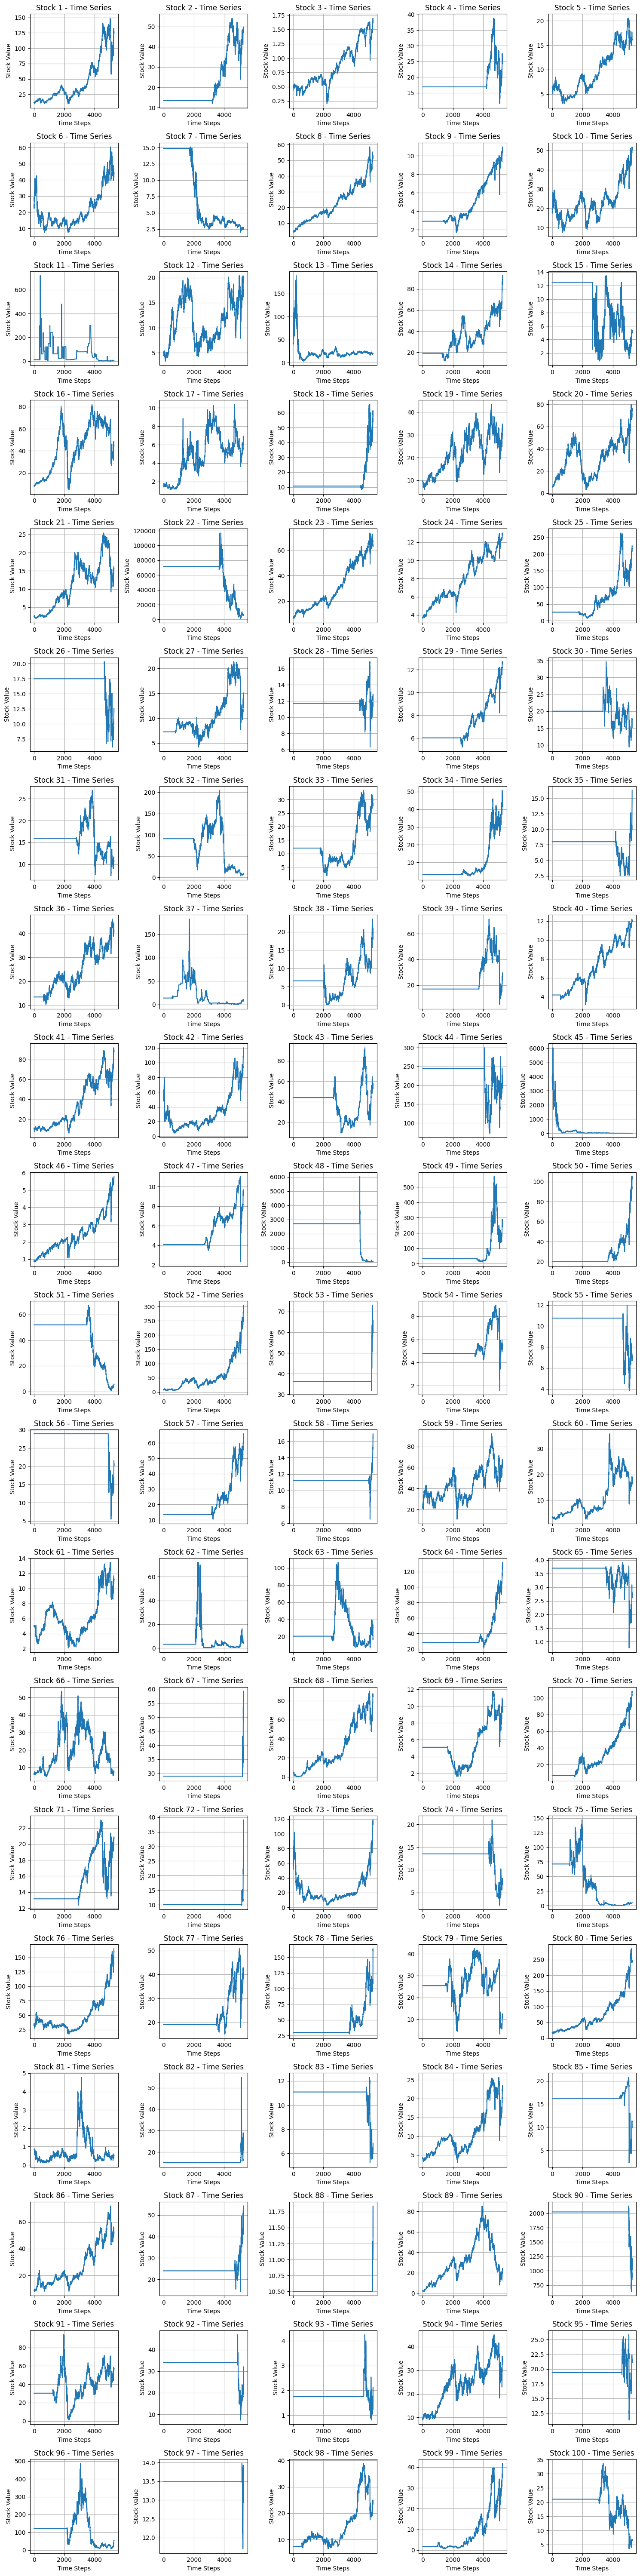

In [4]:

def plot_timeseries(tensor, num_charts=5):
    """
    Plots time-series data for multiple stocks from the tensor in a grid layout with 5 charts per row.

    Parameters:
    - tensor (torch.Tensor): Time-series data with shape [num_stocks, time_steps].
    - num_charts (int): The number of charts to plot. Each chart corresponds to one stock.
    """
    # Check the number of stocks
    num_stocks, num_time_steps = tensor.shape

    # Ensure num_charts doesn't exceed the number of available stocks
    num_charts = min(num_charts, num_stocks)

    # Calculate the number of rows required for the grid
    rows = (num_charts + 4) // 5  # This ensures that we have a full row for the remaining charts

    # Create a figure with subplots
    fig, axes = plt.subplots(rows, 5, figsize=(15, 3 * rows))
    
    # Flatten axes array to easily index through them
    axes = axes.flatten()

    # Plot each stock's time-series data
    for i in range(num_charts):
        ax = axes[i]
        ax.plot(tensor[i].cpu().numpy())  # Move tensor to CPU and convert to numpy for plotting
        ax.set_title(f"Stock {i+1} - Time Series")
        ax.set_xlabel("Time Steps")
        ax.set_ylabel("Stock Value")
        ax.grid(True)
    
    # Hide any unused subplots
    for i in range(num_charts, len(axes)):
        axes[i].axis('off')  # Hide the empty subplots

    plt.tight_layout()  # Adjust the layout to avoid overlap
    plt.show()


# Plotting the first 5 stocks' time-series data
plot_timeseries(data, num_charts=100)

In [5]:
# data = torch.diff(data, dim=1)

# data = torch.cat((data[:, :-1], deltas), dim=1)
# def standardize(tensor, dim, epsilon=1e-12):
#     mean = tensor.mean(dim=dim, keepdim=True)
#     std = tensor.std(dim=dim, keepdim=True)
#     return (tensor - mean) / (std + epsilon)


# data = standardize(data, 1)

# def min_max_scaling(tensor):
#     return (tensor - tensor.min()) / (tensor.max() - tensor.min())
    
# data = min_max_scaling(data)


def scale_timeseries_data(data, dim=0):

    # Replace NaNs with zeros
    data = torch.nan_to_num(data, nan=0.0)

    # Standardize along the specified dimension
    # Calculate mean and std along the specified dimension
    mean = data.mean(dim=dim, keepdim=True)
    std = data.std(dim=dim, keepdim=True)

    # Avoid division by zero for dimensions with zero std
    std[std == 0] = 1

    # Scale the data (standardization)
    scaled_data = (data - mean) / std

    return scaled_data
    
data = scale_timeseries_data(data, dim=0)  # Scale each stock independently

In [6]:
training_data = data.transpose(0, 1)
print(training_data.shape)

torch.Size([5283, 4735])


In [7]:
num_of_channels=4735

In [8]:
training_data = data[0:num_of_channels].transpose(0, 1)
print(training_data.shape)

torch.Size([5283, 4735])


In [9]:
config = TransformerConfig(
    # precision=torch.float16,
    precision=torch.float32,
    batch_size=128,
    block_size=16,
    causal=True,
    input_embed=num_of_channels,
    n_embed=128,
    output_embed=num_of_channels,
    n_head=8,
    n_layer=8,
    learning_rate=1e-4
)
config.eval_interval=50

trainer1 = KarpathyTransformerRunner(config, training_data, training_data)

if not trainer1.load_model("abc"):
    trainer1.train_iterate_n(20000)

Using device: mps
10.463679 M parameters
loaded model version abc


/Users/dmytro/Documents/workspace/ai-workspace/UsStockTimeseries1/transformer_common.py:161: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.l

In [ ]:

# Reverse normalization function
def inverse_normalize(tensor, original_data,dim=0):
    mean = original_data.mean(dim=dim, keepdim=True)
    std = original_data.std(dim=dim, keepdim=True)
    return tensor * std + mean

# Reverse differencing function
def inverse_difference(predictions, last_known_value):
    restored_values = [last_known_value]  # Start with the last known value
    for diff in predictions:
        restored_values.append(restored_values[-1] + diff)
    return restored_values[1:]  # Skip the initial value

# Generate predictions for 100 future days for 20 stocks
num_stocks = 20  # The number of stocks you want to predict
days_to_predict = 5  # Predict for 100 future days
predictions = []

context = training_data[-config.block_size:, :].unsqueeze(0)  # Use last block_size days as context
print(f"context={context.shape}")


prediction_diff = trainer1.generate(context, max_new_tokens=days_to_predict).transpose(0, 2).detach()
print(prediction_diff.shape)

# # Inverse normalization
# prediction_diff = inverse_normalize(prediction_diff, training_data)

# # Inverse differencing using last value from original data
# last_known_value = training_data[:, -1]
# prediction = inverse_difference(prediction_diff.squeeze(), last_known_value)
# predictions.append(prediction)

# # Plot the predictions for each stock
# fig, axes = plt.subplots(4, 5, figsize=(20, 15))  # 4 rows x 5 columns for 20 stocks

# for i, ax in enumerate(axes.flatten()):
#     ax.plot(predictions[i], label=f'Stock {i+1}')
#     ax.set_title(f'Stock {i+1} - 100-Day Prediction')
#     ax.set_xlabel('Days')
#     ax.set_ylabel('Price')
#     ax.grid(True)
#     ax.legend()

# plt.tight_layout()
# plt.show()

def inverse_scale_timeseries_data(scaled_data, mean, std):
    # Reverse the standardization process
    return scaled_data * std + mean

predictions_original_scale = inverse_scale_timeseries_data(prediction_diff, mean.unsqueeze(-1), std.unsqueeze(-1))


plot_timeseries(predictions_original_scale[:,:,0])